# Grafičke metode analize stabilnosti sustava

U grafičke metode analize stabilnosti sustava spadaju Nyquistov i Bodeov dijagram te očitavanje faznog i amplitudnog osiguranja putem dobivenih dijagrama. Također pole-zero plot koji nam prikazuje položaj polova i nula sustava.  
Radi problema u iscrtavanju Nyquistovog dijagrama putem funkcije iz ```Python Control Systems Library``` knjižnice možemo uzeti samo Bodeov dijagram kao pouzanu metodu za grafičku analizu stabilnosti.

Python funkcije koje se koriste za ove operacije dio su ```Python Control Systems Library``` knjižnice.
```python
* tf
* bode_plot
* impulse_response
* step_response
* margin
* pole
* zero
* pzmap
```
Popis svih funkcija dostupan je na https://python-control.readthedocs.io/en/0.8.2/control.html#function-ref

te dio ```Sympy``` knjižnice.
```python
* symbols
* Poly
* simplify
* expand
* fraction
```

i ```Matplotlib``` knjižnice.
```python
* pyplot
```

Prije početka potrebno je instalirati ```Python Control Systems Library``` tako da otvorite ```Jupyter QtConsole``` iz početnog izbornika ```Anaconde``` te upišete 
```python
conda install -c conda-forge control
```


Za početak potrebno je obrisati sve varijable iz memorije.

In [1]:
import os
clear = lambda: os.system('cls')
clear()

0

Potom importati sve funkcije i knjižnice koje koristimo.

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

import scipy
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import control
from control import *
import sympy
from sympy import symbols, Poly, simplify, expand, fraction

Potom definirati sve varijable koje koristimo kao Sympy simbole.

In [3]:
s = symbols('s')

### Primjer: Sustav drugog reda s nulom u ishodistu

In [4]:
tf = (s / ((s+6)*(s+2)))
display(tf)

Prijenosnu funkciju je kao u vježbi "Koeficijenti prijenosne funkcije" potrebno razbiti na brojnik i nazivnik te dobiti zapis u obliku matrice koeficijenata sustava.

In [5]:
tf = expand(tf)
display(tf)

In [6]:
brojnik, nazivnik = fraction(tf)
display(brojnik)
display(nazivnik)

In [7]:
brojnik = Poly(brojnik, s)
nazivnik = Poly(nazivnik, s)

In [8]:
brojnik = brojnik.coeffs()
nazivnik = nazivnik.coeffs()
display(brojnik)
display(nazivnik)

Sustav je sada potrebno definirati kao prijenosnu funkciju koristeći funkciju ```control.tf(SUSTAV)``` no to ne možemo izravno izvršiti već moramo pretvoriti ```Sympy``` matricu u ```Numpy``` array putem ```np.array()``` funkcije.  
Ukoliko se radi o prijenosnoj funkciji s nulom ili polom u iskodistu (s^1); radi kompatibilnosti potrebno je dodati nulu na kraj arraya putem ```np.append(ARRAY, 0)``` funkcije. To je potrebno iz razloga što ```poly()``` i ```.coefs()``` funkcija iz gornjeg postupka za stvaranje matrica ```brojnik``` i ```nazivnik``` ignorira koeficijent 0 uz s^0 ukoliko postoji koeficijent višeg eksponenta s, to predstavlja problem za sustave gdje je u brojniku samo s^1 ili sustave gdje imamo astatizam prvog reda (s^1 u nazivniku)  
  
I dalje je naj pametnije ponovno kreirati ```Control Systems Library``` prijenosnu funkciju ```tf([brojnik],[nazivnik])``` kako bi se eliminirala moguća pogreška u konverziji.
Također je potrebno uz pomoć ```display()``` funkcije provjeriti je li izraz prijenosne funkcije točan.

In [9]:
brojnik = np.array(brojnik).astype(np.float64)
brojnik = np.append(brojnik, 0)
nazivnik = np.array(nazivnik).astype(np.float64)
display(brojnik)
display(nazivnik)

array([1., 0.])

array([ 1.,  8., 12.])

Sada smo u mogućnosti kreirati ```Control Systems Library``` prijenosnu funkciju.

In [10]:
sys = control.tf(brojnik, nazivnik)
display(sys)


      s
--------------
s^2 + 8 s + 12

Bodeov dijagram iscrtavamo putem funkcije 
```python
control.bode_plot(sys)
```

No potrebno je definirati što ce se iscrtati, u ovom slucaju magnitudna i fazna karakteristika u frekvencijskoj domeni, sto definiramo kao ```mag, phase, omega```

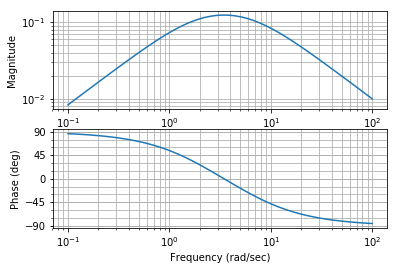

In [11]:
mag, phase, omega = control.bode_plot(sys)

U gornjem prikazu su frekvencije prikazane u ```rad/sec```, ukoliko želimo prikazati frekvenciju u Hz potrebno je u funkciju dodati ```, Hz=True```
```python
control.bode_plot(sys, Hz=True)
```

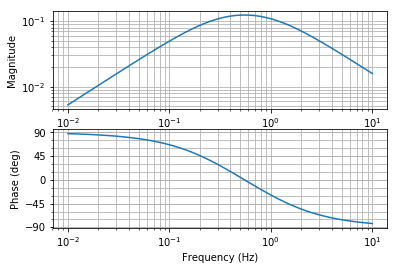

In [12]:
mag, phase, Hz = control.bode_plot(sys, Hz=True)

Također u standardnim prikazima magnituda je prikazana u apsolutnoj vrijednosti, ukoliko želimo magnitudu prikazati u dB potrebno je u funkciju dodati ```, dB=True```
```python
control.bode_plot(sys, Hz=True, dB=True)
```

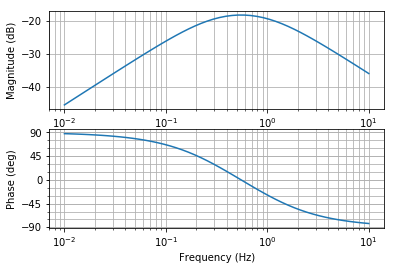

In [13]:
mag, phase, Hz = control.bode_plot(sys, Hz=True, dB=True)

Kao što vidimo gornji Bode dijagrami su maleni, da bi smo povećali prikaz potrebno je pozvati sljedeće funkcije:
```python
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(SIRINA, VISINA)
fig.savefig('IME_SLIKE.png', dpi=DPI)
```

```fig=gcf()``` sprema zadnji, tj. trenutni prikaz kao varijablu fig (get current figure)  
```set_size_inches(SIRINA,VISINA)``` postavlja širinu i visinu prikaza na ekranu.  
```savefig('IME_SLIKE.png, dpi=DPI)``` sprema prikazanu sliku u direktorij gdje se nalazi python skripta u rezoluciji prema zadanom DPI, preporucljivo 300-600 DPI.

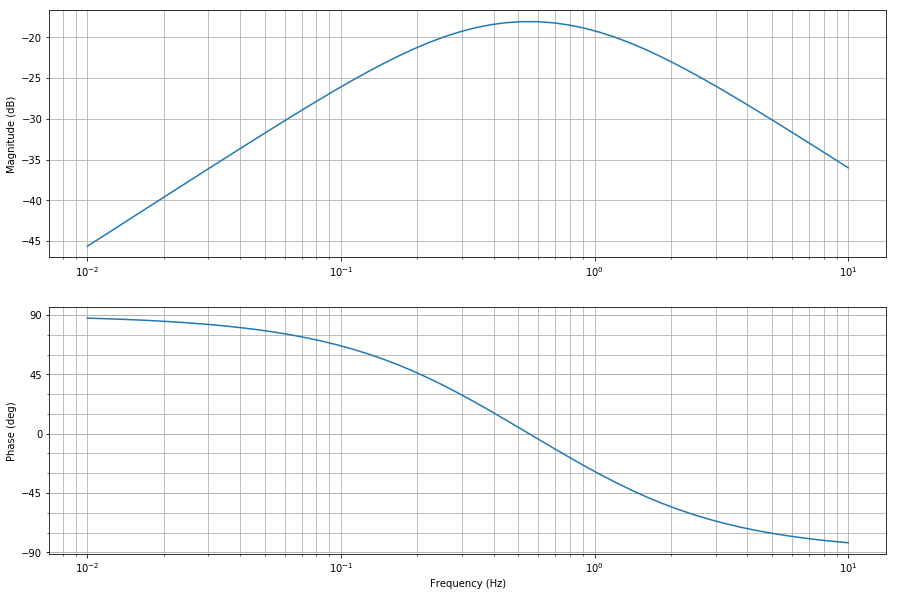

In [14]:
mag, phase, Hz = control.bode_plot(sys, Hz=True, dB=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
fig.savefig('BODE.png', dpi=300)

Za prikaz polova koristi se funkcija ```control.pole(SUSTAV)```

In [15]:
control.pole(sys)

array([-6., -2.])

Za prikaz nula koristi se funkcija ```control.zero(SUSTAV)```

In [16]:
control.zero(sys)

array([0.])

Za grafički prikaz polova i nula u Re-Im koordinatnom sustavu koristi se funkcija ```control.pzmap(SUSTAV)```

(array([-6., -2.]), array([0.]))

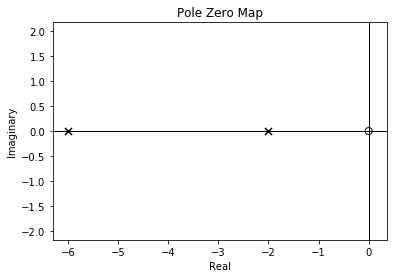

In [17]:
control.pzmap(sys)

Odziv na ```delta``` funkciju dobivamo putem ```control.impulse_response(SUSTAV)``` funkcije.
No pozivanje ove funkcije samo izračuna vrijednosti odziva u vremenskoj domeni, za grafički prikaz potrebno je putem ```matplotlib``` ```pyplot``` funkcije ```plot(X,Y)```, u ovom slucaju definirane kao ```plt.plot(X,Y)``` iscrtati graf funkcije.
Putem funkcije ```plt.ylabel('TEKST')``` te ```plt.xlabel('TEKST')``` možemo imenovati X i Y osi.

Text(0, 0.5, 'Y(t)')

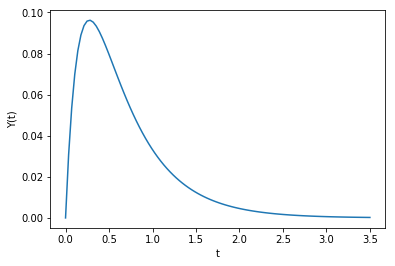

In [18]:
T, yout = control.step_response(sys)

plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('Y(t)')

Text(0, 0.5, 'Y(t)')

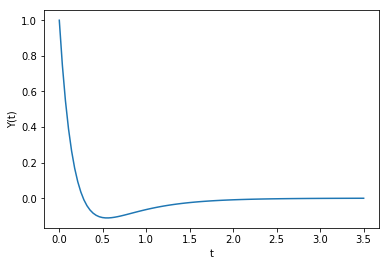

In [19]:
T, yout = control.impulse_response(sys)

plt.plot(T, yout)
plt.xlabel('t')
plt.ylabel('Y(t)')

```Control Systems Library``` kao impulsni odziv i odziv na step daje samo grafički prikaz, tj. numeričke vrijednosti, za analitički prikaz potrebno je početnu prijenosnu funkciju u ```Sympy``` pomnožiti s laplaceovom transformacijom željene funkcije, time dobivamo odziv u frekvencijskoj domeni, za odziv u vremenskoj domeni potrebno je izvršiti inverznu Laplaceovu transformaciju dobivenog odziva putem funkcije ```inverse_laplace_transform(ODZIV)``` koja je dio ```Sympy``` knjižnice.

Laplaceova transformacija delta funkcije je = 1  
Laplaceova transformacija step funkcije je = 1/s

Simbol ```t``` je potrebno definirati kao pozitivan, iz razloga što radimo s LTI sustavima koji su po definiciji kauzalni. Ukoliko nije definiran kao pozitivna vrijednost tada nećemo dobiti dobar oblik inverzne Laplaceove transformacije s kakvim inače radimo.

In [20]:
from sympy.integrals.transforms import inverse_laplace_transform
t = symbols('t', positive=True)

In [21]:
impulse = 1 * tf
display(impulse)

In [22]:
impulse_time = inverse_laplace_transform(impulse, s, t)
display(impulse_time)

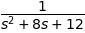

In [23]:
step = (1/s) * tf
display(step)

Za rastav funkcije na parcijalne razlomke koristimo ```apart(FUNKCIJA)``` funkciju iz ```Sympy``` knjiznice.

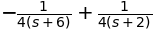

In [24]:
from sympy import apart

step = apart(step)
display(step)

In [25]:
step_time = inverse_laplace_transform(step, s, t)
display(step_time)

step_time = apart(step_time)
display(step_time)

Za graficki prikaz odziva u vremenskoj domeni mozemo koristiti ```plot(FUNKCIJA)``` funkciju iz ```sympy.plotting```

In [26]:
from sympy.plotting import plot

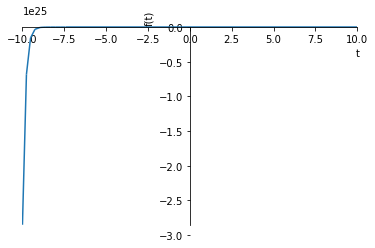

In [27]:
plot(step_time)

Kao sto je vidljivo prikaz ne lici na gore dobiveni prikaz iz ```Control Systems Library``` funkcije, no to je iz razloga sto granice prikaza nisu postavljene, ukoliko granice postavimo kao sto su gore automatski postavljene dobiti cemo ispravan prikaz.  
```python
plot(FUNKCIJA, (t, POCETAK, KRAJ))
```

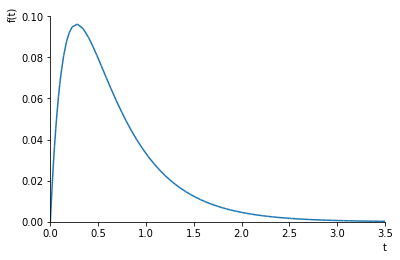

In [28]:
plot(step_time, (t, 0, 3.5))

Kako je gornji sustav strukturno stabilan, te na nijednoj frekvenciji karakteristika nema gain=0 niti fazno kašnjenje od 180 stupnjeva ```margin(SUSTAV)``` funkcija nema rezultat.

In [29]:
margin(sys)

### Primjer: Sustav 4og reda

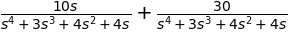

=



        10 s + 30
-------------------------
s^4 + 3 s^3 + 4 s^2 + 4 s

In [30]:
tf2 = ((10*(s+3)) / (s * (s+2) * ((s**2) + s + 2)))
tf2 = expand(tf2)
display(tf2)

sys2 = control.tf([10,30],[1,3,4,4,0])

print("=")
display(sys2)

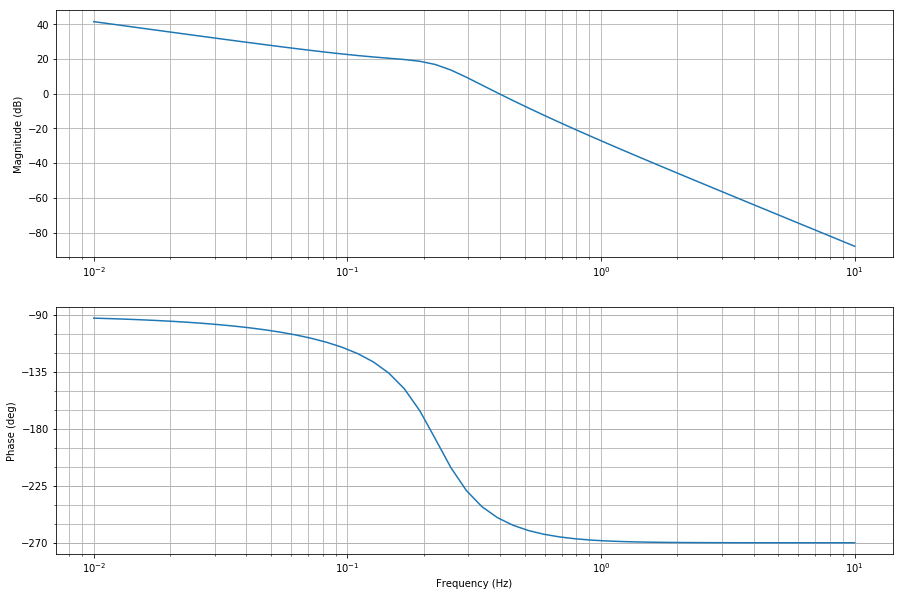

In [31]:
mag2, phase2, Hz2 = control.bode_plot(sys2, Hz=True, dB=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

Putem ```margin(SUSTAV)``` funkcije mozemo odrediti amplitudno i fazno osiguranje, rezultat su:  
* gm (Gain Margin) - Amplitudno osiguranje
* wg (omega-gain) - Frekvencija na kojoj ocitavamo amplitudno osiguranje
* pm (Phase Margin) - Fazno osiguranje
* wp (omega-phase) - Frekvencija na kojoj ocitavamo fazno osiguranje

In [32]:
margin(sys2)

In [33]:
gm, pm, wg, wp = margin(sys2)
print("Amplitudno osiguranje = ")
display(gm)
print("Na frekvenciji w =")
display(wg)
print("")
print("Fazno osiguranje = ")
display(pm)
print("Na frekvenciji w =")
display(wp)


Amplitudno osiguranje = 


Na frekvenciji w =



Fazno osiguranje = 


Na frekvenciji w =


(array([-2. +0.j        , -0.5+1.32287566j, -0.5-1.32287566j,
         0. +0.j        ]), array([-3.]))

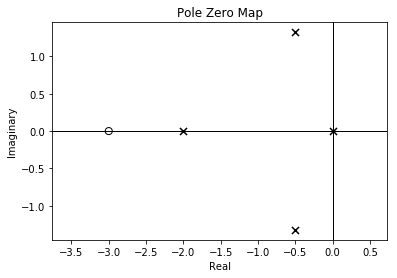

In [34]:
pzmap(sys2)